<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/LogisticRegression_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistics Regression Assignment 
## Written by Abiola Obembe
### Date: 2021-01-31
### Course: ML masters with deployment and deep learning
### Objective: I decided to treat this as a classification problem by creating  a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.
-----------------------------------------------------------------------------
### ----------  Assignment starts here -------------------------------------------------

##  Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

### Description of Variables
The dataset contains 6366 observations of 9 variables:

*   rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
*   age: woman's age
*   yrs_married: number of years married
*   children: number of children
*   religious: woman's rating of how religious she is (1 and 4 for not religious and strongly religious respectively) 
*   educ: level of education (9,12,14,16,17,20 for grade school, high school,  some college, college graduate, some graduate school, and advanced degree repsectively)
*   occupation: woman's occupation (1,2,3,4,5,6 for student, farming/semi-skilled/unskilled, white collar, teacher/nurse/writer/technician/skilled, managerial/buiness, professional with advanced degree respectively) 
*   occupation_husb: husband's occupation (same coding as above)
*   affairs: time spent in extra-marital affairs



In [182]:
# Code to loading data and modules:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score


# Import other libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [183]:
# Load dataset
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [184]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)

dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


## Explorartory Data Analysis

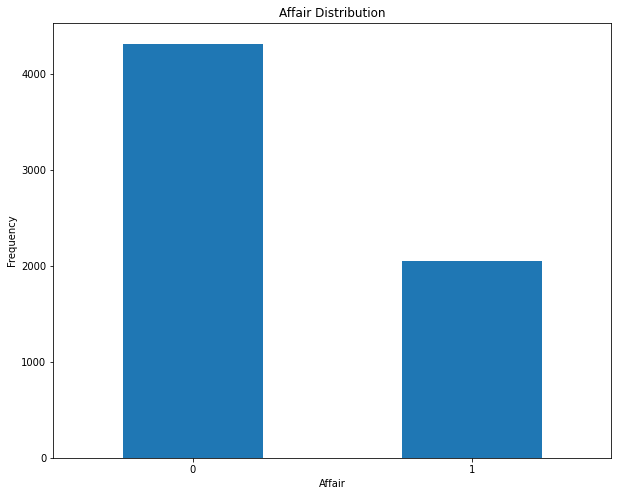

In [185]:
# Let's visualize the distribution of target data ( establishing imbalanced dataset)
count_classes = pd.value_counts(dta['affair'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Affair Distribution")
plt.xticks(range(2))
plt.xlabel("Affair")
plt.ylabel('Frequency')
plt.show()

In [186]:
# Bascic statistics
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [187]:
# Check for missing values
print("The missing values in each column are as below :")
dta.isna().sum()

The missing values in each column are as below :


rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [188]:
# Print shape of dataframe
print("The shape of the dataframe is :", dta.shape)

The shape of the dataframe is : (6366, 10)


In [189]:
# Calculate the skewness and kurtosis values
for col in dta.columns:
    print(col)
    print("skewness:", dta[col].skew())
    print("kurtosis:", dta[col].kurtosis())
    print('-'*35)

rate_marriage
skewness: -1.0097098161713198
kurtosis: 0.5586778483176911
-----------------------------------
age
skewness: 0.576149016240865
kurtosis: -0.7334713744603283
-----------------------------------
yrs_married
skewness: 0.7258540925474222
kurtosis: -0.7910950095441063
-----------------------------------
children
skewness: 0.8909797097871077
kurtosis: 0.24526553366683812
-----------------------------------
religious
skewness: -0.028350000731947027
kurtosis: -0.7331538454490478
-----------------------------------
educ
skewness: 0.7947143500303777
kurtosis: 0.4812992779668548
-----------------------------------
occupation
skewness: 0.34394587737967675
kurtosis: -0.08986725099883541
-----------------------------------
occupation_husb
skewness: -0.38044191277136896
kurtosis: -0.8422028166881925
-----------------------------------
affairs
skewness: 8.764859367462167
kurtosis: 132.05872418620982
-----------------------------------
affair
skewness: 0.7596728152790337
kurtosis: -1.4233

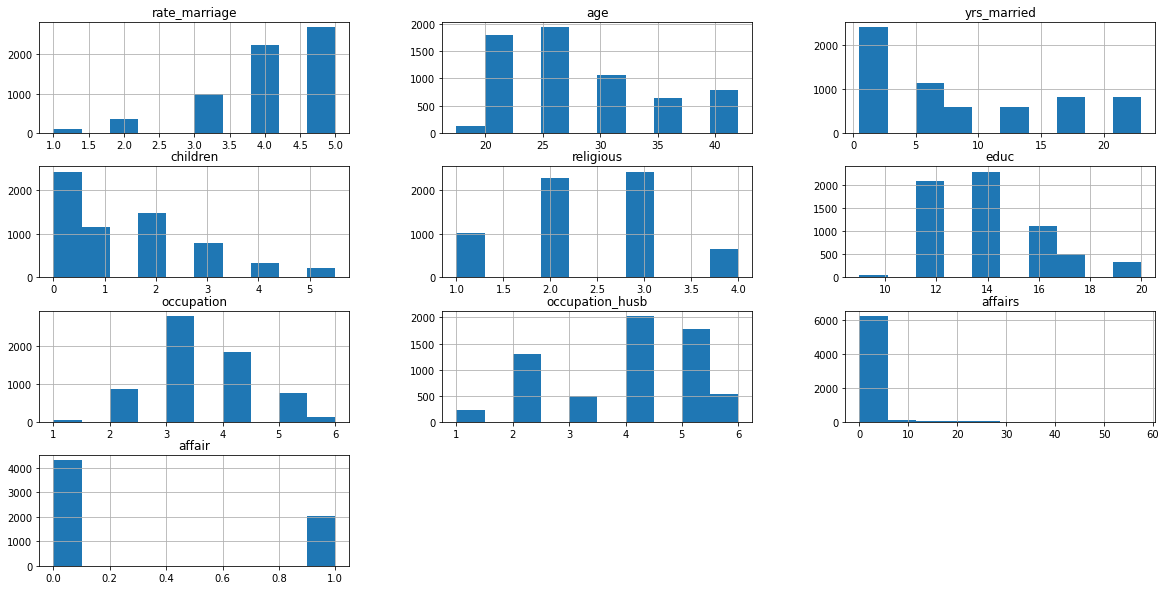

In [190]:
# Visualize histogram of dataset
dta.hist(figsize= (20,10), bins= 10)
plt.show()

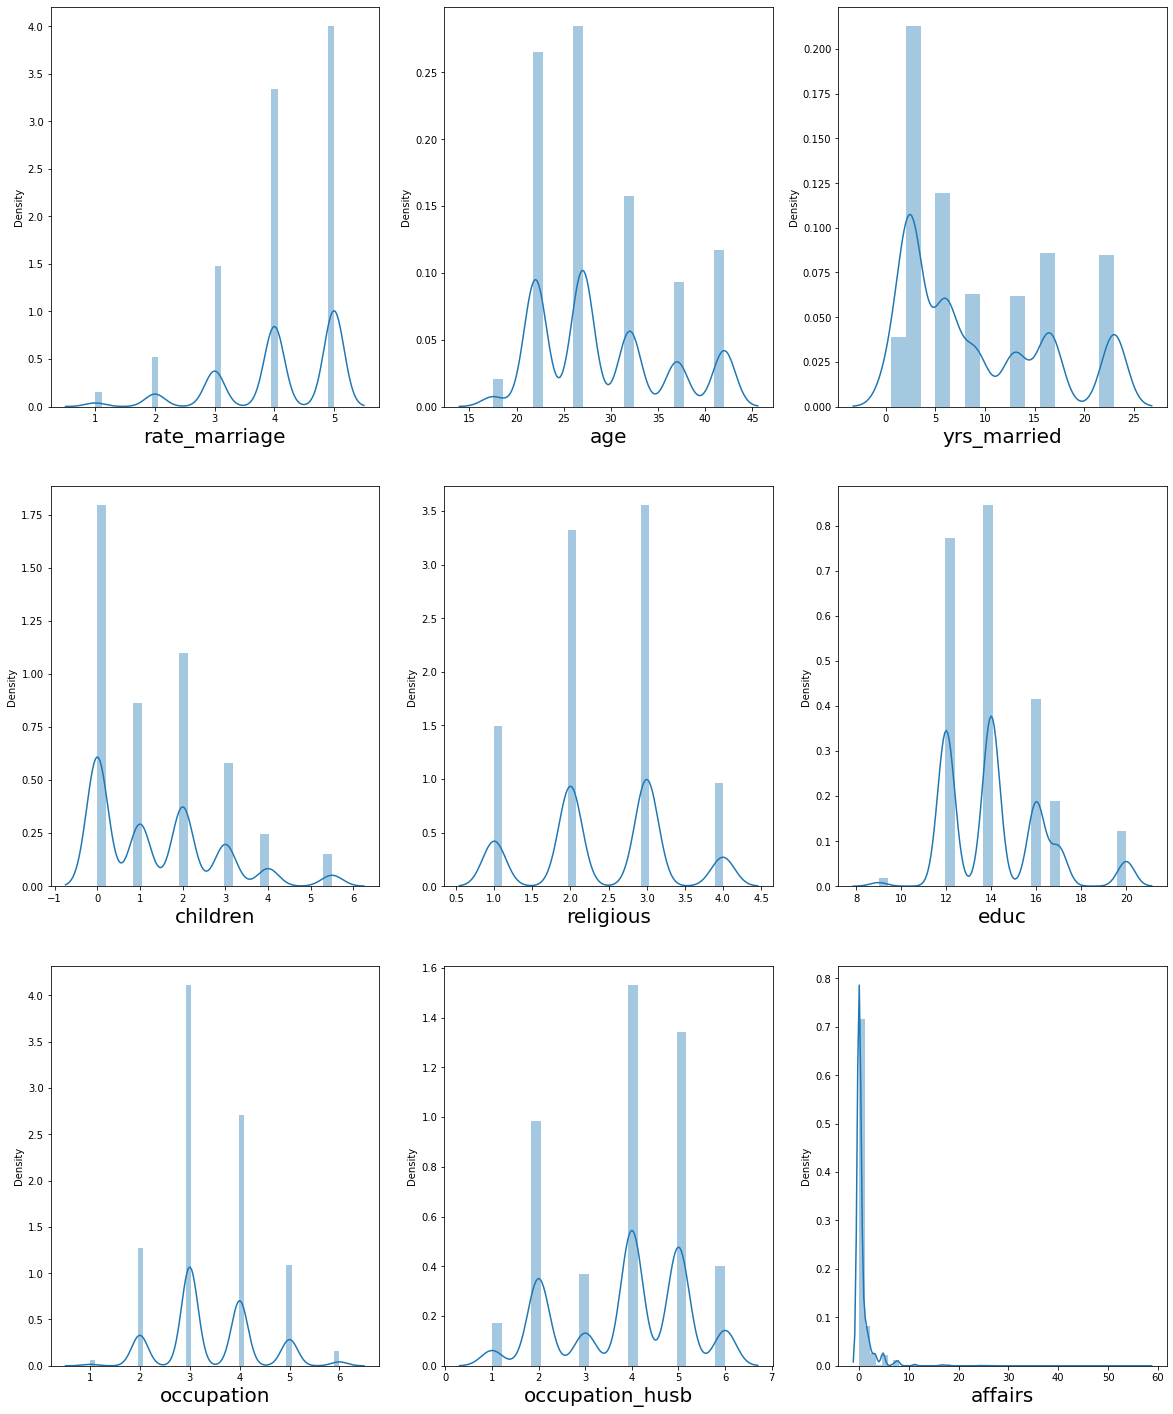

In [191]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

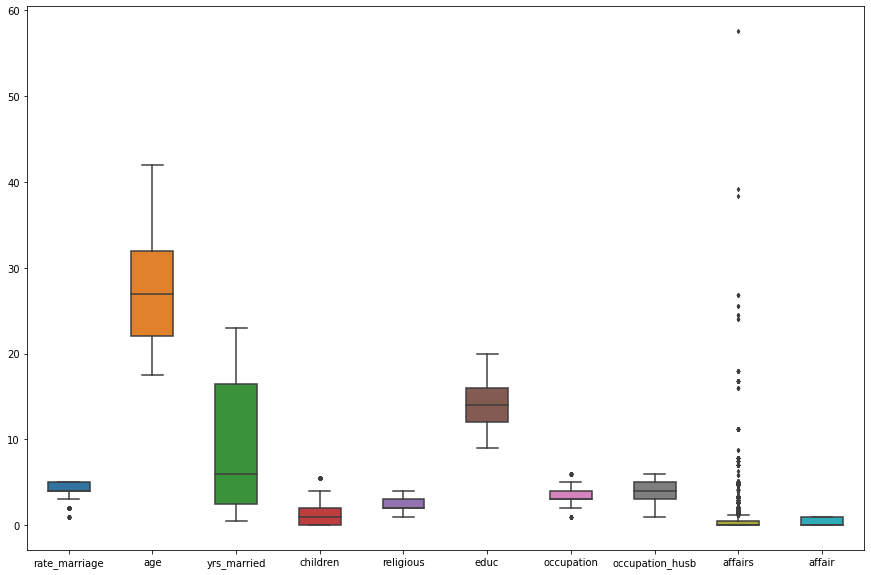

In [192]:
# Check for ouliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [193]:
# Create the features and target column from the dataframe
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3',
                       'C(occupation)[T.4.0]':'occ_4', 'C(occupation)[T.5.0]':'occ_5',
                       'C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]':'occ_husb_3', 'C(occupation_husb)[T.4.0]':'occ_husb_4',
                       'C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [194]:
# Print first few rows from features
X[0:5]

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [195]:
# Print first few rows from target variable
y[0:5]

array([1., 1., 1., 1., 1.])

In [196]:
# Check the shape of the dataframe
X.shape

(6366, 17)

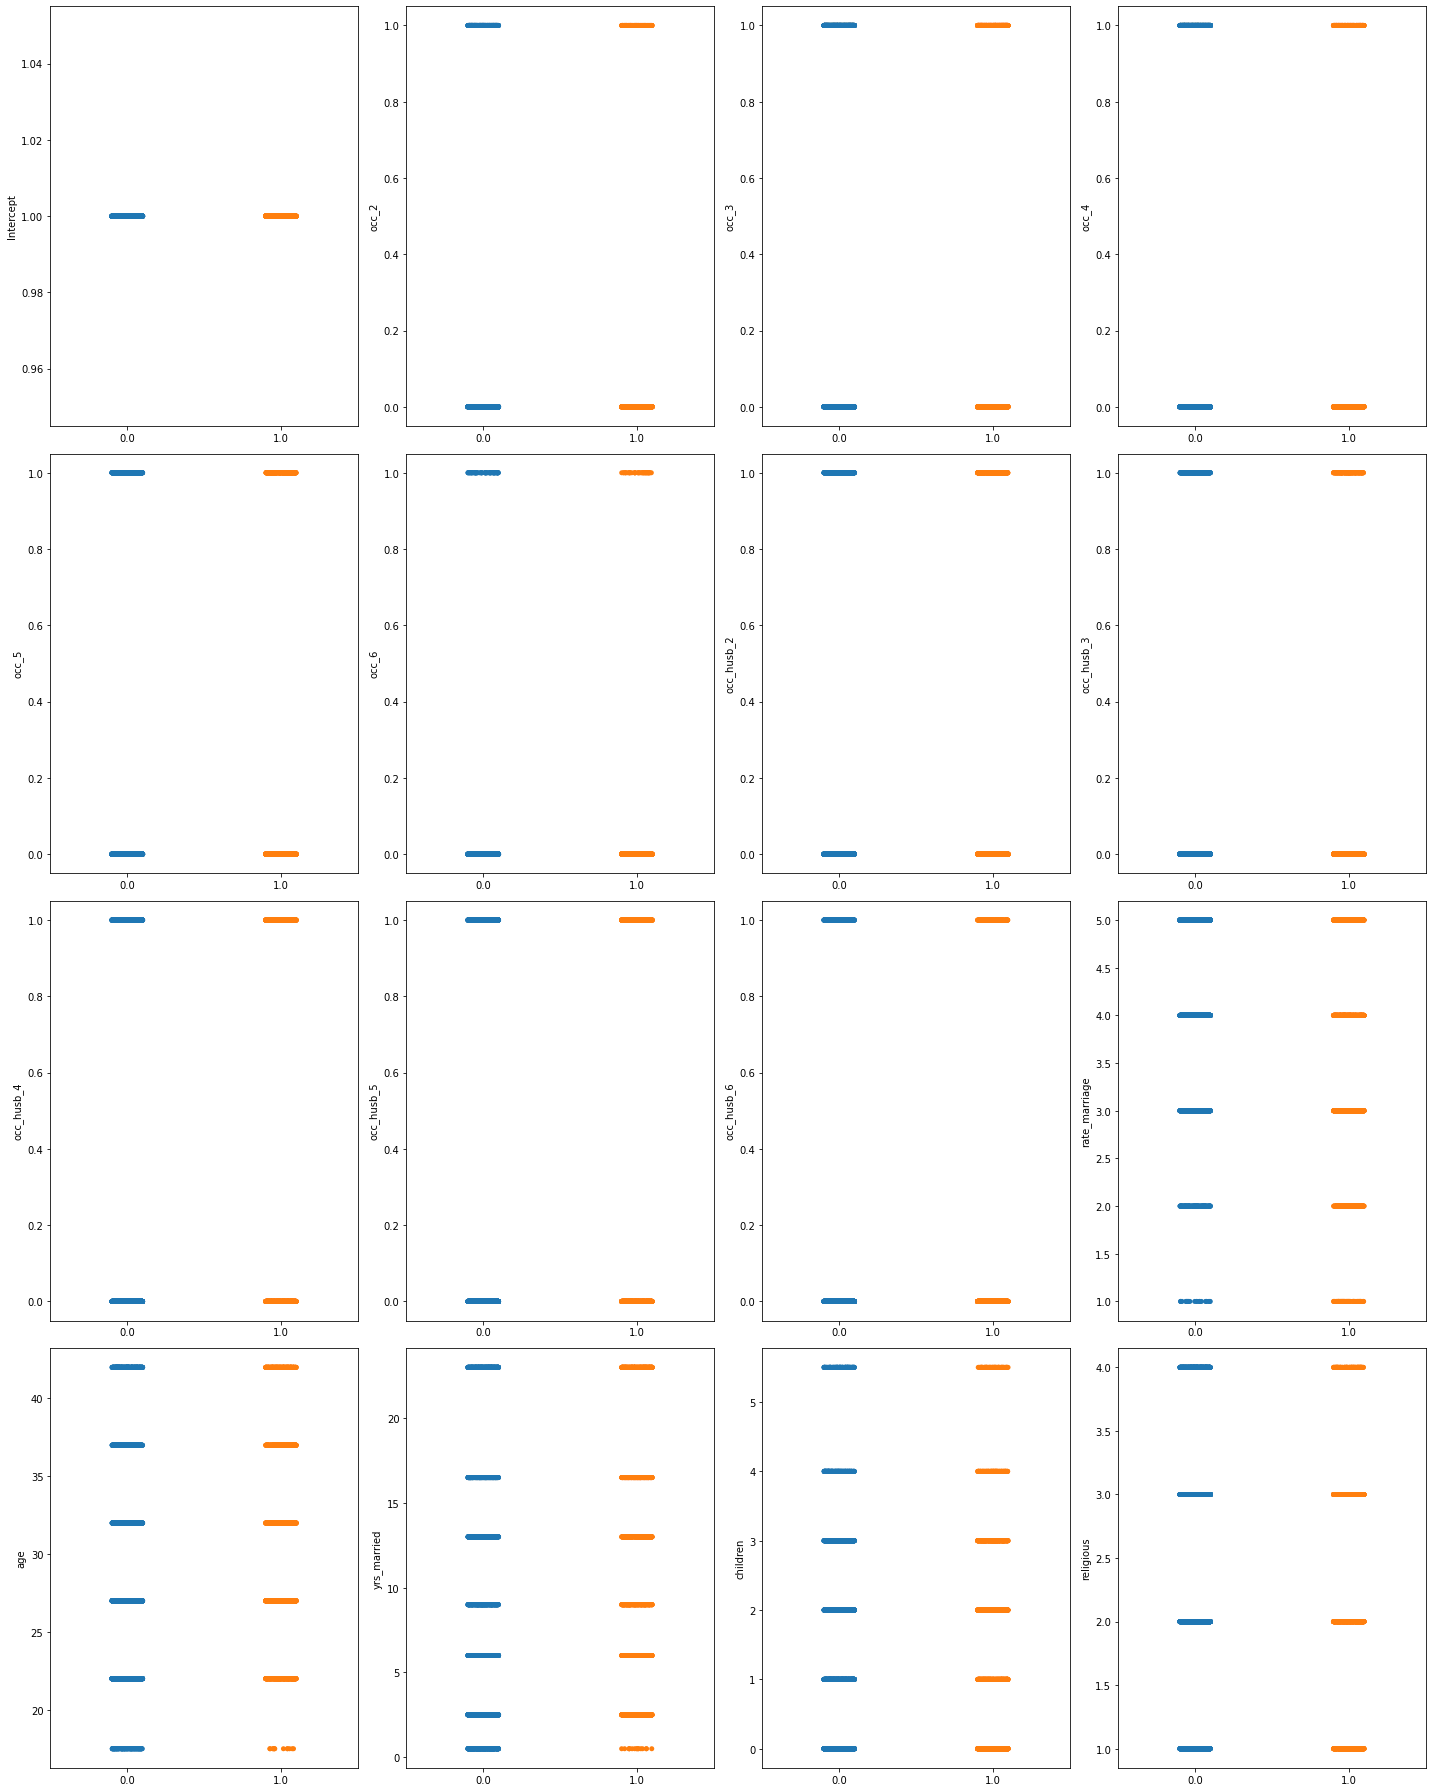

In [197]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()

In [198]:
# Let's check for multicolinearity
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [199]:
# Multi-colinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


We will drop all columns that have VIF > 5 from the columns that have it been encoded. Hence we neglect all columns with suffix "occ". Therefore, the columns age and years married will be dropped from X.

In [200]:
# Drop age ad years married
X.drop(['age','yrs_married'], axis = 1, inplace = True)
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,14.0


## Model Training: Logistic Regression Algorithm

In [201]:
# Scale the new  faeture set using standard scaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [202]:
# Split dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_sc,y, test_size= 0.25, random_state = 355)

In [203]:
# Create logistic regression object and train model
clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
# Let's evaluate model performance on train set
y_hat = clf.predict(X_train)

print("accuracy score on train set is :", accuracy_score(y_train, y_hat))

# Confusion Matrix
conf_mat = confusion_matrix(y_train,y_hat)
class_report = classification_report(y_train, y_hat)


print("The confusion matrix report on train set is summarized below: ")
print(conf_mat)
print("The classification report on train set is summarized below :")
print(class_report)



accuracy score on train set is : 0.721826560536238
The confusion matrix report on train set is summarized below: 
[[2920  309]
 [1019  526]]
The classification report on train set is summarized below :
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      3229
         1.0       0.63      0.34      0.44      1545

    accuracy                           0.72      4774
   macro avg       0.69      0.62      0.63      4774
weighted avg       0.71      0.72      0.69      4774



In [205]:
# Let's evaluate model performance on train set
y_pred = clf.predict(X_test)

print("accuracy score on test set is :", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print("The confusion matrix report on test set is summarized below: ")
print(conf_mat)
print("The classification report on test set is summarized below :")
print(class_report)

accuracy score on test set is : 0.714824120603015
The confusion matrix report on test set is summarized below: 
[[979 105]
 [349 159]]
The classification report on test set is summarized below :
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      1084
         1.0       0.60      0.31      0.41       508

    accuracy                           0.71      1592
   macro avg       0.67      0.61      0.61      1592
weighted avg       0.69      0.71      0.68      1592



In [206]:
# Print other evaluation metrics
print("The f1 score is :", f1_score(y_test, y_pred))
print("The precision score is :", precision_score(y_test, y_pred))
print("The recall score is :", recall_score(y_test, y_pred))

print("The ROC-AUC score is :", roc_auc_score(y_test, y_pred))

The f1 score is : 0.4119170984455959
The precision score is : 0.6022727272727273
The recall score is : 0.31299212598425197
The ROC-AUC score is : 0.6080643286747829


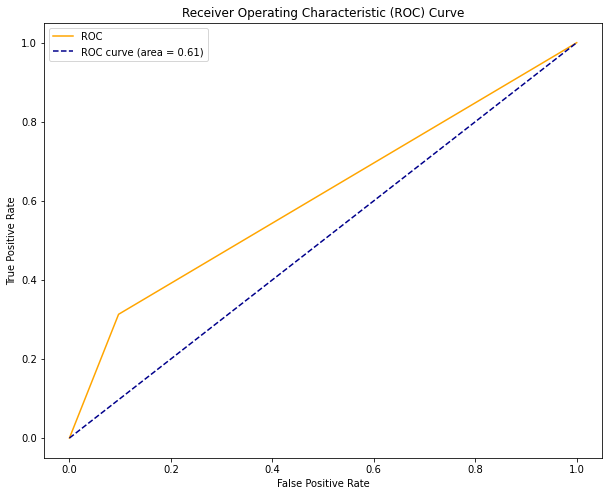

In [207]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Model Tunning

In [208]:
# Create function to evaluate results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [209]:
# Create logistic regression object and parameters to tune
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_sc, y)

print_results(cv)

BEST PARAMS: {'C': 10, 'solver': 'newton-cg'}

0.704 (+/-0.012) for {'C': 0.001, 'solver': 'newton-cg'}
0.704 (+/-0.012) for {'C': 0.001, 'solver': 'lbfgs'}
0.718 (+/-0.035) for {'C': 0.001, 'solver': 'liblinear'}
0.704 (+/-0.012) for {'C': 0.001, 'solver': 'sag'}
0.704 (+/-0.012) for {'C': 0.001, 'solver': 'saga'}
0.717 (+/-0.027) for {'C': 0.01, 'solver': 'newton-cg'}
0.717 (+/-0.027) for {'C': 0.01, 'solver': 'lbfgs'}
0.718 (+/-0.034) for {'C': 0.01, 'solver': 'liblinear'}
0.717 (+/-0.027) for {'C': 0.01, 'solver': 'sag'}
0.717 (+/-0.027) for {'C': 0.01, 'solver': 'saga'}
0.719 (+/-0.034) for {'C': 0.1, 'solver': 'newton-cg'}
0.719 (+/-0.034) for {'C': 0.1, 'solver': 'lbfgs'}
0.718 (+/-0.034) for {'C': 0.1, 'solver': 'liblinear'}
0.719 (+/-0.034) for {'C': 0.1, 'solver': 'sag'}
0.719 (+/-0.034) for {'C': 0.1, 'solver': 'saga'}
0.719 (+/-0.034) for {'C': 1, 'solver': 'newton-cg'}
0.719 (+/-0.034) for {'C': 1, 'solver': 'lbfgs'}
0.719 (+/-0.034) for {'C': 1, 'solver': 'liblinear'}
0.7

### Best Model perfomance evaluation

In [210]:
# Print best model
clf2 = cv.best_estimator_
clf2

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
# Save model
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(clf2,f)
    
with open('standardScalar.pkl', 'wb') as f:
    pickle.dump(sc,f)

In [212]:
# Let's evaluate model performance on train set
y_pred = clf2.predict(X_test)

print("accuracy score on test set is :", str(np.round( (accuracy_score(y_test, y_pred) * 100), 2)) +'%' )

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print("The confusion matrix report on test set is summarized below: ")
print(conf_mat)
print("The classification report on test set is summarized below :")
print(class_report)

accuracy score on test set is : 71.55%
The confusion matrix report on test set is summarized below: 
[[978 106]
 [347 161]]
The classification report on test set is summarized below :
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      1084
         1.0       0.60      0.32      0.42       508

    accuracy                           0.72      1592
   macro avg       0.67      0.61      0.61      1592
weighted avg       0.69      0.72      0.69      1592



In [213]:
# Print other evaluation metrics
print("The f1 score is :", f1_score(y_test, y_pred))
print("The precision score is :", precision_score(y_test, y_pred))
print("The recall score is :", recall_score(y_test, y_pred))

print("The ROC-AUC score is :", roc_auc_score(y_test, y_pred))

The f1 score is : 0.415483870967742
The precision score is : 0.602996254681648
The recall score is : 0.3169291338582677
The ROC-AUC score is : 0.6095715779992446


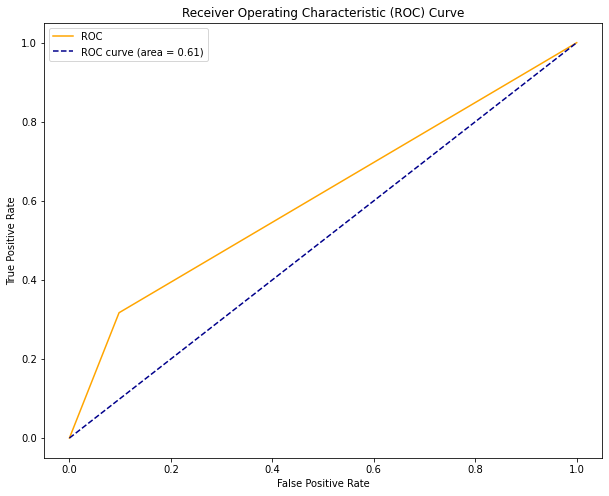

In [214]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()